In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
df_tesla = pd.read_csv(r'/Users/viveksasidharan/code/Documents/GitHub/Resources/Tesla.csv')

In [3]:
df_tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df_tesla.shape

(1692, 7)

In [5]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
#Make two new columns which will be used for making predictions.
df_tesla["HL_Perc"] = (df_tesla["High"]-df_tesla["Low"]) / df_tesla["Low"] * 100
df_tesla["CO_Perc"] = (df_tesla["Close"] - df_tesla["Open"]) / df_tesla["Open"] * 100

In [8]:
dates = np.array(df_tesla["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [10]:
df_tesla = df_tesla[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [11]:
#Define the label column
df_tesla["PriceNextMonth"] = df_tesla["Adj Close"].shift(-30)

In [12]:
df_tesla.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


In [16]:
#Make fetaure and label arrays
X = np.array(df_tesla.drop(["PriceNextMonth"], axis=1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df_tesla.dropna(inplace = True)
y = np.array(df_tesla["PriceNextMonth"])

In [17]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
#Define the prediction model
model = RandomForestRegressor()

In [20]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.960878164682519


In [22]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [23]:
predictions = model.predict(X_Check)

In [25]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = df_tesla["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

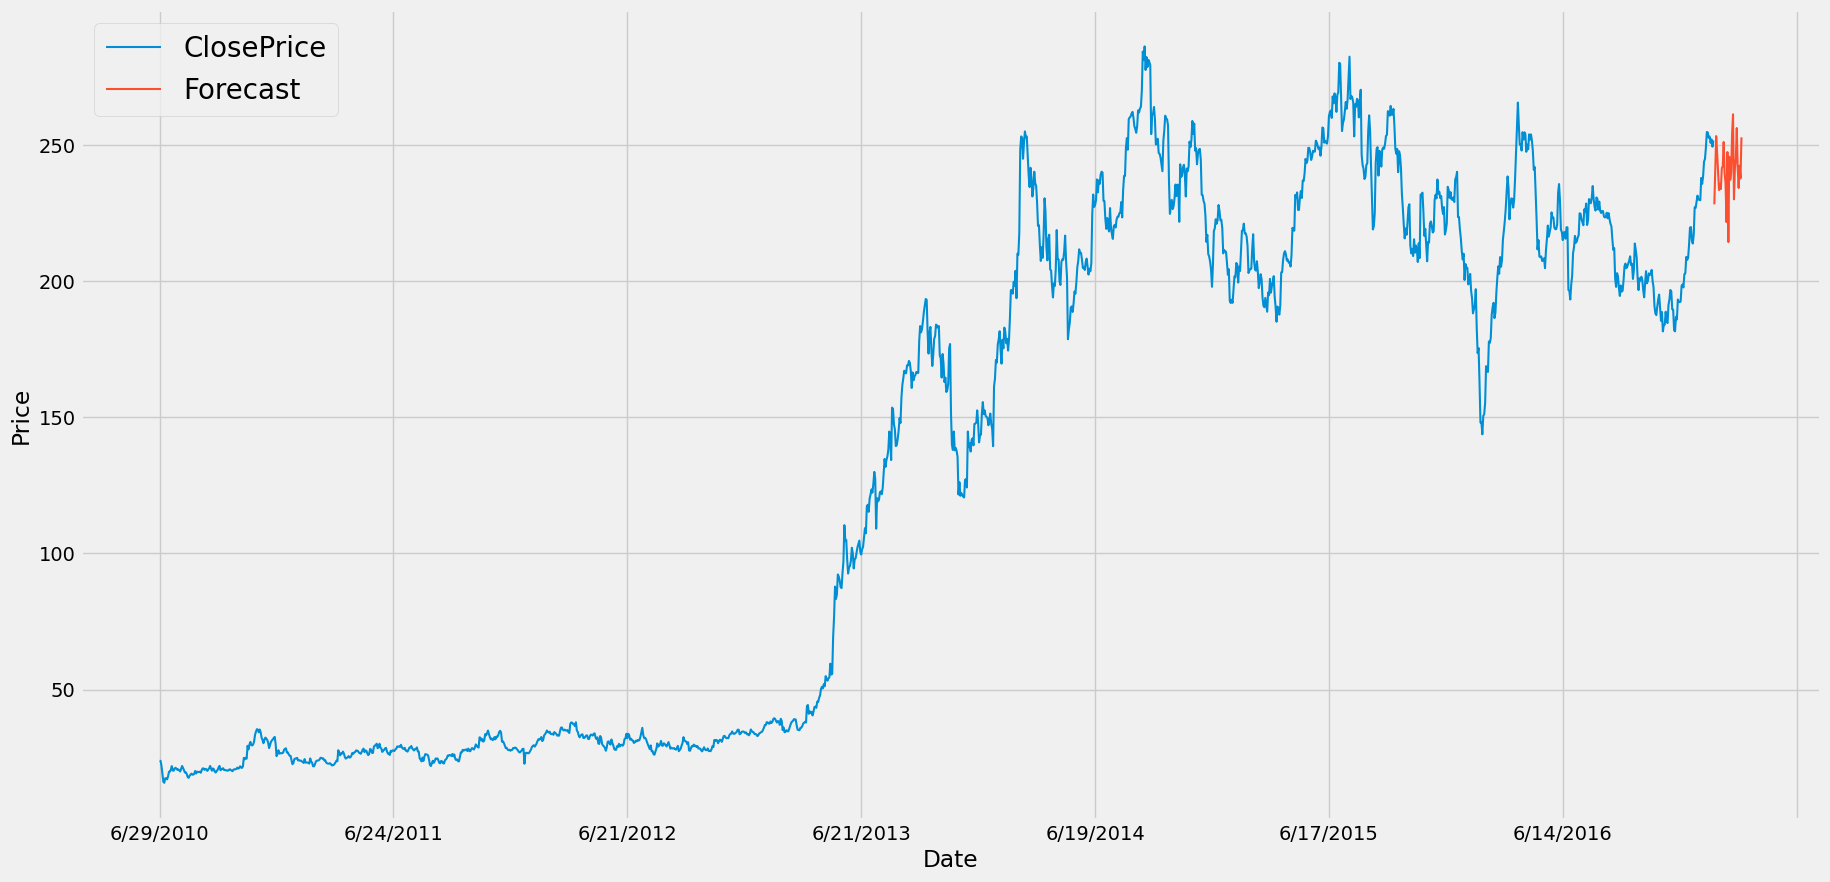

In [26]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')